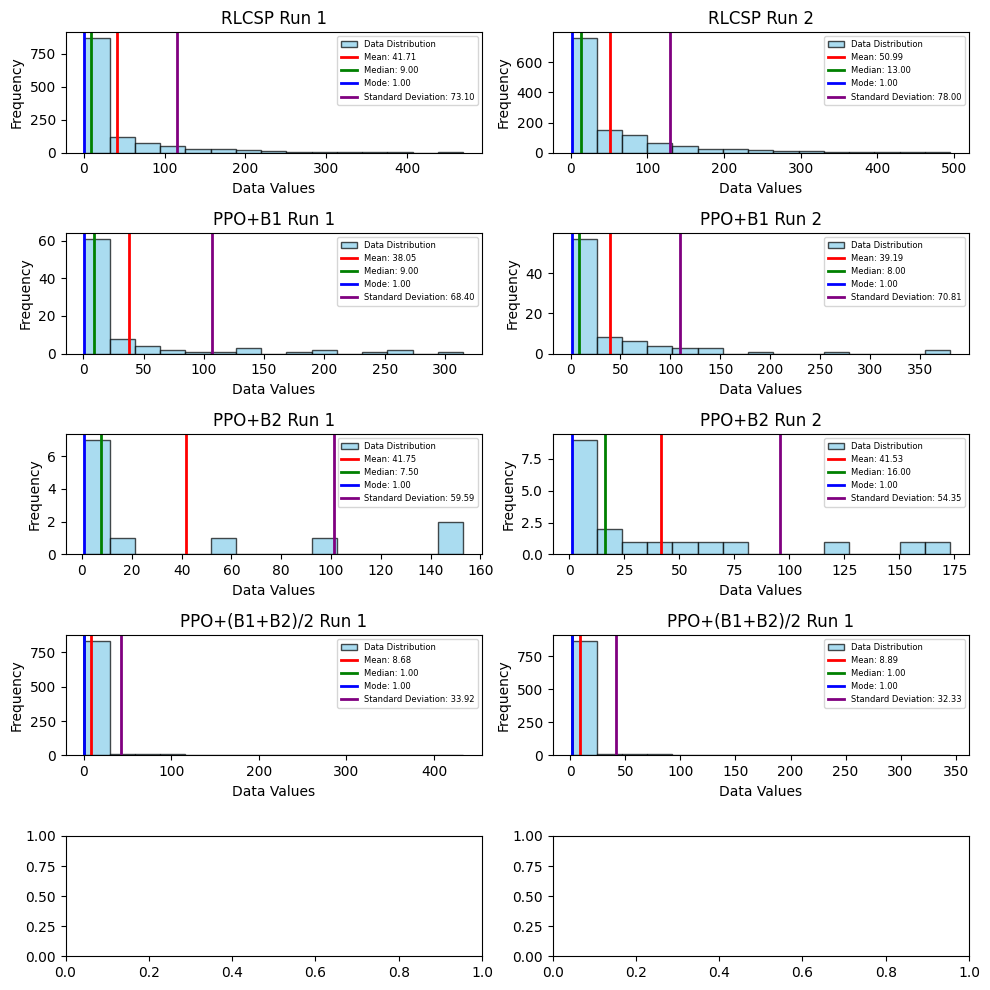

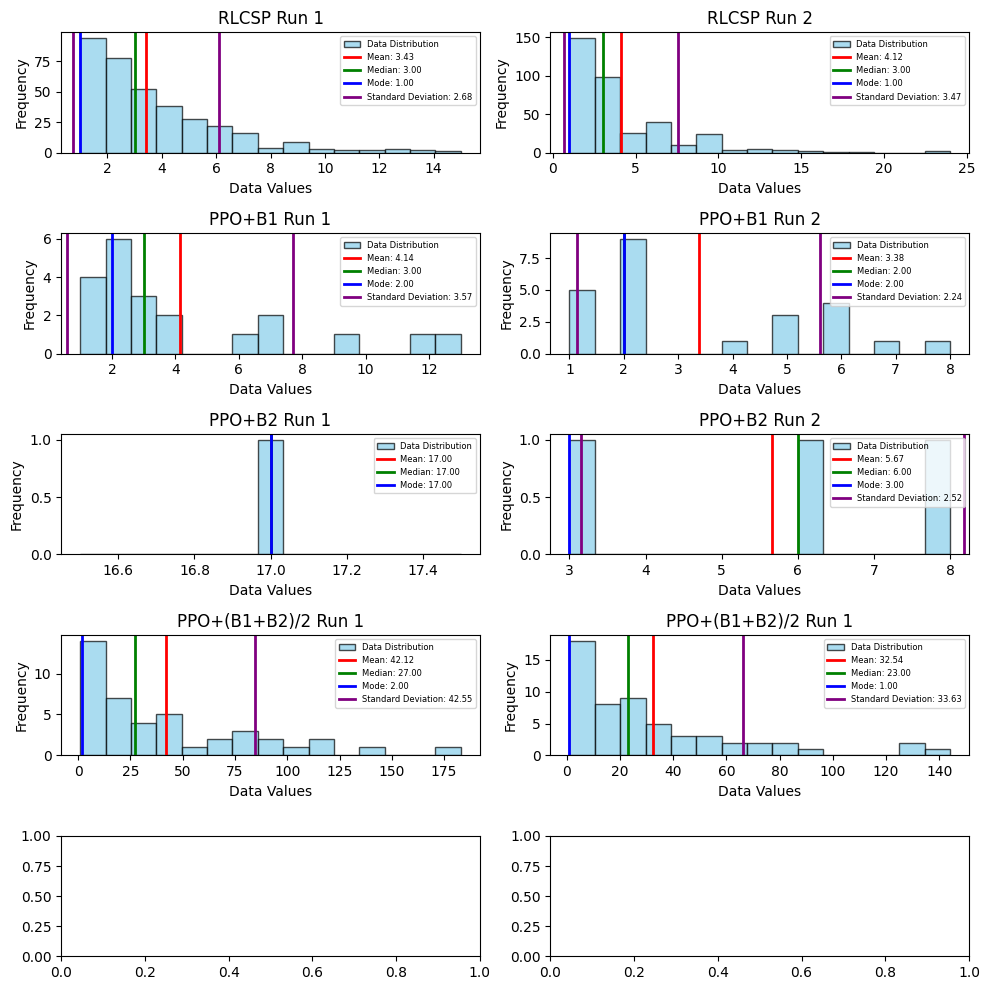

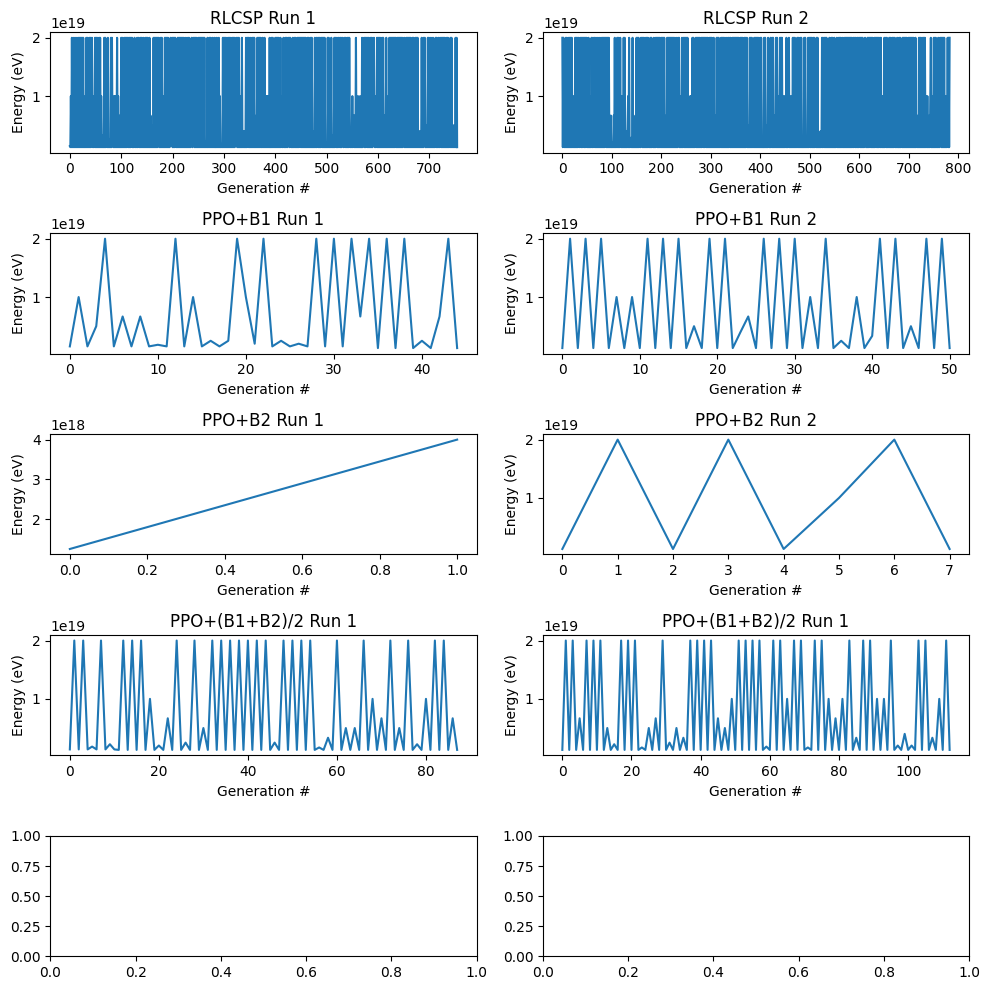

In [ ]:
import numpy as np
import statistics as st
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import json


file = pd.read_csv(".../CS1840_ Codebase Overview - Results.csv") # change this path
file = file.set_axis(['','Initial Gen #','Compound','Algorithm','Run #','Runner','Started','Ended','Duration','Lowest eV','Avg # Moves','Moves Array',
                               'Avg # Generations','Generations Array','Gen Seq Array'], axis=1)
file = file.iloc[2:]
file = file.reset_index(drop=True)

# display(file)

experiment_names = ['RLCSP Run 1', 'RLCSP Run 2', 'PPO+B1 Run 1', 'PPO+B1 Run 2', 'PPO+B2 Run 1', 'PPO+B2 Run 2',
                    'PPO+(B1+B2)/2 Run 1', 'PPO+(B1+B2)/2 Run 1', 'NPG Run 1', 'NPG Run 2']
# experiment_rows = [0,1,3,4,6,7,9,10,12,13] # change to this vector after adding final data points
experiment_rows = [0,1,3,4,6,7,12,13] # comment out after adding final data points

def calc_stats(data_array, experiment_names):
        counter = 0
        fig, ax = plt.subplots(5,2,figsize=(10, 10))
    
        rows = 4
        cols = 2
        for j in range(rows):
                for i in range(cols):
                        data = data_array[counter]
                        data = json.loads(data)
                        meanVal = st.mean(data)
                        medianVal = st.median(data)
                        modeVal = stats.mode(data).mode
                        if len(data) > 1:
                                stdVal = st.stdev(data)

                        ax[j,i].hist(data, bins = 15, color = 'skyblue', alpha = 0.7, 
                                edgecolor = 'black', label = 'Data Distribution')
                        ax[j,i].axvline(meanVal, color = 'red', linewidth = 2, 
                                label = f'Mean: {meanVal:.2f}')
                        ax[j,i].axvline(medianVal, color = 'green', linewidth = 2, 
                                label = f'Median: {medianVal:.2f}')
                        ax[j,i].axvline(modeVal, color = 'blue', linewidth = 2, 
                                label = f'Mode: {modeVal:.2f}')

                        if len(data) > 1:
                                if (meanVal - stdVal) >= 0:
                                        ax[j,i].axvline(meanVal - stdVal, color = 'purple', linewidth = 2)
                                ax[j,i].axvline(meanVal + stdVal, color = 'purple', linewidth = 2, 
                                                label = f'Standard Deviation: {stdVal:.2f}')


                        ax[j,i].set_title(experiment_names[counter])
                        ax[j,i].set_xlabel("Data Values")
                        ax[j,i].set_ylabel("Frequency")
                        ax[j,i].legend()
                        ax[j,i].legend(fontsize=6) # using a size in points
                        counter+= 1
        fig.tight_layout()

def plot_generations(data_array, experiment_names):
        counter = 0
        fig, ax = plt.subplots(5,2,figsize=(10, 10))
    
        rows = 4
        cols = 2
        for j in range(rows):
                for i in range(cols):
                        data = data_array[counter]
                        data = json.loads(data)

                        ax[j,i].plot(np.arange(len(data)),data)

                        ax[j,i].set_title(experiment_names[counter])
                        ax[j,i].set_xlabel("Generation #")
                        ax[j,i].set_ylabel("Energy (eV)")
                        counter+= 1
        fig.tight_layout()

moves_array = file['Moves Array'][experiment_rows].reset_index(drop=True)
generations_array = file['Generations Array'][experiment_rows].reset_index(drop=True)
gen_seq_array = file['Gen Seq Array'][experiment_rows].reset_index(drop=True)

calc_stats(moves_array, experiment_names)
calc_stats(generations_array, experiment_names)
plot_generations(gen_seq_array, experiment_names)
